# Exploratory Data Analysis (EDA) in Python
### Business Data Analysis - Lab Session

This notebook is designed for a 3-hour lab focused on EDA using Python. It includes:
- Univariate and Bivariate Analysis
- PCA (Principal Component Analysis)
- Market Basket Analysis (Apriori Algorithm)
- Challenging exercises for practice


## Hour 1: Univariate and Bivariate Analysis using Titanic Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# Load the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')



In [ ]:
# Display dataset information
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


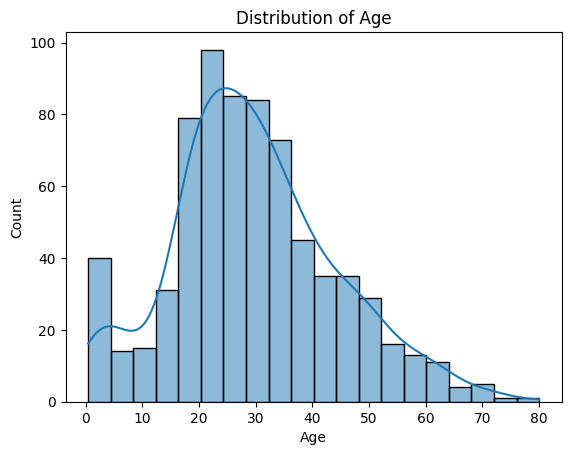

In [ ]:
# Plotting the distribution of Age
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Distribution of Age")
plt.show()
# kde=true : It adds a smooth, continuous curve (the KDE) to the histogram.
#This helps visualize the underlying distribution of the data more clearly
#than just the bars of the histogram.




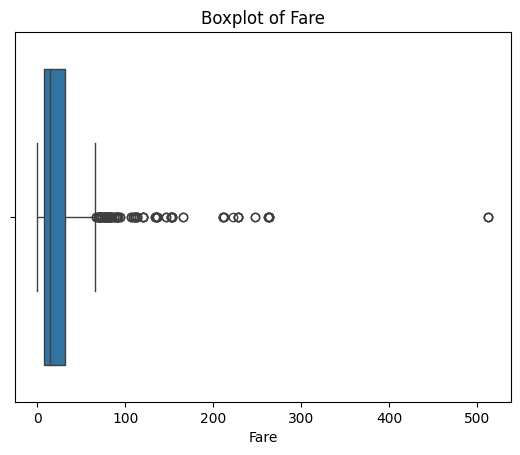


Interpretation of the Box Plot for Fare:

- The box itself represents the interquartile range (IQR), which spans from the first quartile (Q1 - 25th percentile) to the third quartile (Q3 - 75th percentile). The line inside the box is the median (Q2 - 50th percentile).
- The whiskers extend from the box to the minimum and maximum data points within 1.5 times the IQR from the box edges. Data points outside the whiskers are considered outliers and are shown as individual dots.
- The approximate average fare (mean) is likely slightly higher than the median line within the box because the box plot shows many outliers with very high fares, which will pull the mean upwards. Based on the visual representation, the median (the line in the middle of the box) appears to be around 10-15. The box itself extends roughly from 7 to 30. The outliers are significantly higher. Therefore, the mean is likely between 20 and 40, significantly influenced by the high fare outliers. To get the exact average, yo

In [ ]:
# Boxplot to detect outliers in Fare
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()
print("""
Interpretation of the Box Plot for Fare:

- The box itself represents the interquartile range (IQR), which spans from the first quartile (Q1 - 25th percentile) to the third quartile (Q3 - 75th percentile). The line inside the box is the median (Q2 - 50th percentile).
- The whiskers extend from the box to the minimum and maximum data points within 1.5 times the IQR from the box edges. Data points outside the whiskers are considered outliers and are shown as individual dots.
- The approximate average fare (mean) is likely slightly higher than the median line within the box because the box plot shows many outliers with very high fares, which will pull the mean upwards. Based on the visual representation, the median (the line in the middle of the box) appears to be around 10-15. The box itself extends roughly from 7 to 30. The outliers are significantly higher. Therefore, the mean is likely between 20 and 40, significantly influenced by the high fare outliers. To get the exact average, you would need to calculate the mean of the 'Fare' column.
""")


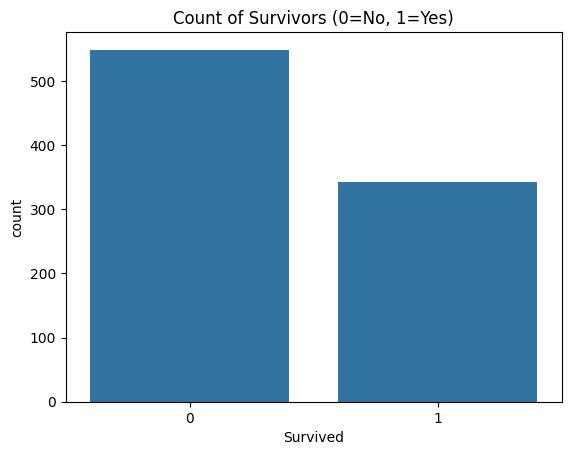

In [ ]:
import matplotlib.pyplot as plt
# Count plot for categorical feature 'Survived'
sns.countplot(x='Survived', data=df)
plt.title("Count of Survivors (0=No, 1=Yes)")
plt.show()
# Explanation: This visualizes the frequency of each category in the 'Survived' column.
# It's a fundamental univariate analysis step for categorical data to understand the class distribution.


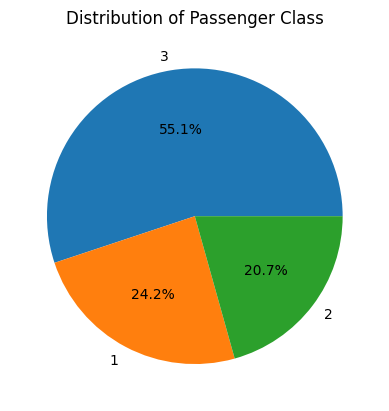

In [ ]:

# Pie chart for 'Pclass' distribution
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Passenger Class")
plt.ylabel('') # Remove default ylabel
plt.show()
# Explanation: This shows the proportion of each passenger class.
# Pie charts are useful for visualizing the distribution of a categorical variable as proportions of a whole.





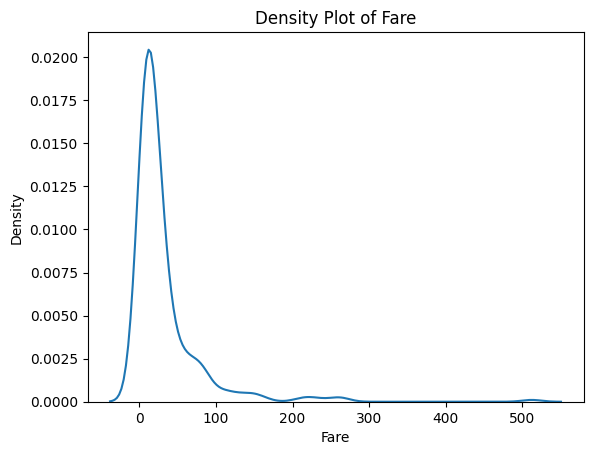

In [ ]:
# Density plot for 'Fare'
sns.kdeplot(df['Fare'])
plt.title("Density Plot of Fare")
plt.show()
# Explanation: The Kernel Density Estimate plot provides a smoothed representation
# of the distribution of the 'Fare' variable, similar to a histogram but continuous.


In [ ]:
#The density plot of 'Fare' shows the probability density function of the fare paid by passengers.

# Shape: The plot is heavily skewed to the right (positively skewed). This indicates that most passengers paid a lower fare,
# while a smaller number of passengers paid significantly higher fares.
# Peak: The highest peak in the density plot is located near 0, confirming that a large number of passengers paid a very low fare.
# Tail: The long tail extending to the right shows the presence of higher fare values,
# although their frequency decreases as the fare increases.
# Interpretation:  The distribution of 'Fare' is not uniform or normally distributed.
# The concentration of data points at lower values and the presence of a
# long tail suggest that 'Fare' is a variable with a wide range
# and many outliers on the higher end, which is also evident from the boxplot of 'Fare'.
# This kind of distribution often requires transformation (like log transformation) for certain types of analysis
# or modeling to meet assumptions of normality or linearity.

In [ ]:
# Value counts and proportion for 'Sex'
sex_counts = df['Sex'].value_counts()
print("Value Counts for Sex:")
print(sex_counts)
print("\nProportions for Sex:")
print(sex_counts / len(df))
# Explanation: Calculating value counts and proportions provides a numerical summary
# of the distribution for the 'Sex' variable, complementing the visual count plot.
# len(df)` returns the number of rows in the pandas DataFrame `df`.
# In the context of the Titanic dataset loaded in the preceding code, it would return the total number of passengers in the dataset.


Value Counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64

Proportions for Sex:
Sex
male      0.647587
female    0.352413
Name: count, dtype: float64


In [ ]:

# Describe categorical features
print("\nDescription of Categorical Features:")
print(df[['Survived', 'Pclass', 'Sex', 'Embarked']].describe())
# Explanation: The .describe() method for categorical columns provides count, unique values,
# the most frequent value (top), and its frequency (freq). This is a concise way to summarize
# multiple categorical variables in a univariate analysis context.




Description of Categorical Features:
         Survived      Pclass
count  891.000000  891.000000
mean     0.383838    2.308642
std      0.486592    0.836071
min      0.000000    1.000000
25%      0.000000    2.000000
50%      0.000000    3.000000
75%      1.000000    3.000000
max      1.000000    3.000000


In [ ]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# Explanation: Identifying missing values is a crucial part of univariate analysis
# as it highlights data quality issues and potential needs for imputation or removal.


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## PCA using Iris Dataset

In [ ]:
# PCA on Iris dataset
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
print ("""
The Iris dataset is one of the most famous and widely used datasets in machine learning and statistics. It was originally collected by the British statistician and biologist Ronald A. Fisher in 1936. The dataset was designed to study the morphological differences among three species of iris flowers.

The dataset contains a total of 150 samples, divided equally among three species: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four numerical features that represent the physical measurements of the flowers: sepal length, sepal width, petal length, and petal width, all measured in centimeters.

The Iris dataset is commonly used for classification tasks where the goal is to predict the species of an iris flower based on these measurements. It is also frequently utilized to demonstrate data visualization techniques, dimensionality reduction methods like Principal Component Analysis (PCA), and various machine learning algorithms. Its popularity stems from being small and simple enough to understand easily, while still providing well-separated but partially overlapping classes. This balance makes it an excellent benchmark for practicing classification and visualization techniques.
""")


The Iris dataset is one of the most famous and widely used datasets in machine learning and statistics. It was originally collected by the British statistician and biologist Ronald A. Fisher in 1936. The dataset was designed to study the morphological differences among three species of iris flowers.

The dataset contains a total of 150 samples, divided equally among three species: Iris setosa, Iris versicolor, and Iris virginica. Each sample is described by four numerical features that represent the physical measurements of the flowers: sepal length, sepal width, petal length, and petal width, all measured in centimeters.

The Iris dataset is commonly used for classification tasks where the goal is to predict the species of an iris flower based on these measurements. It is also frequently utilized to demonstrate data visualization techniques, dimensionality reduction methods like Principal Component Analysis (PCA), and various machine learning algorithms. Its popularity stems from bei

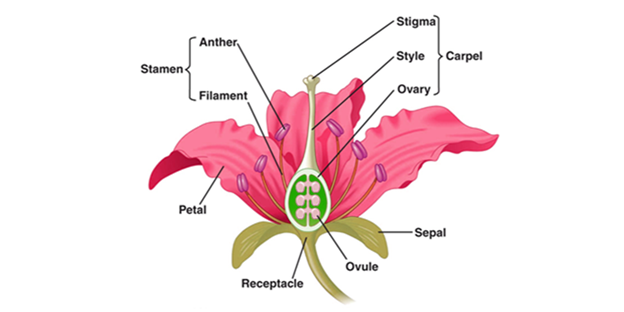

In [ ]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Extract the features (X) and target labels (y).
# Then, it initializes a StandardScaler object and fits it to the feature data (X)
# and transforms it into a standardized form (X_scaled).
# Standardization is a common preprocessing step that scales features to have a
# mean of 0 and a standard deviation of 1. This is often necessary for algorithms
# that are sensitive to the scale of the input features, such as PCA.




NameError: name 'load_iris' is not defined

In [ ]:
print ('''iris.data
This is a NumPy array containing the feature variables — the input measurements for each sample. In the Iris dataset, this includes the four features: sepal length, sepal width, petal length, and petal width. Each row corresponds to one flower sample, and each column corresponds to one feature.

iris.target
This is a NumPy array containing the target labels — the output or class for each sample. In this case, it represents the species of each iris flower encoded as integers:

0 = Iris setosa

1 = Iris versicolor

2 = Iris virginica''')

iris.data
This is a NumPy array containing the feature variables — the input measurements for each sample. In the Iris dataset, this includes the four features: sepal length, sepal width, petal length, and petal width. Each row corresponds to one flower sample, and each column corresponds to one feature.

iris.target
This is a NumPy array containing the target labels — the output or class for each sample. In this case, it represents the species of each iris flower encoded as integers:

0 = Iris setosa

1 = Iris versicolor

2 = Iris virginica


In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)





In [ ]:
print ('''PCA(n_components=2) initializes a Principal Component Analysis model that will reduce the data from its original number of features (4 in Iris dataset) down to 2 principal components.

pca.fit_transform(X_scaled) fits the PCA model on the standardized data (X_scaled), then transforms this data into the new space defined by the top 2 principal components.

The result, X_pca, is a new array where each sample is represented by 2 values instead of 4, capturing the directions with the most variance (information) in the data.''')

PCA(n_components=2) initializes a Principal Component Analysis model that will reduce the data from its original number of features (4 in Iris dataset) down to 2 principal components.

pca.fit_transform(X_scaled) fits the PCA model on the standardized data (X_scaled), then transforms this data into the new space defined by the top 2 principal components.

The result, X_pca, is a new array where each sample is represented by 2 values instead of 4, capturing the directions with the most variance (information) in the data.


In [ ]:
# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Converts the transformed PCA results (X_pca) into a pandas DataFrame with two columns named 'PC1' and 'PC2'.
#Adds a 'Target' column containing the class labels (y) for each sample, so the species info is retained for visualization.

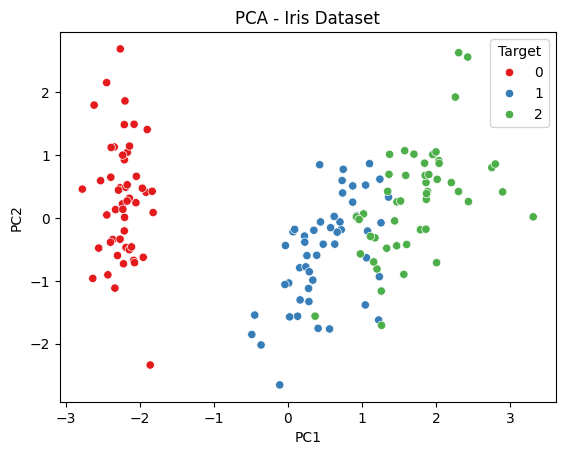

In [ ]:
# Visualize PCA output
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title("PCA - Iris Dataset")
plt.show()

#Uses Seaborn’s scatterplot to create a 2D scatter plot of the samples,
#plotting PC1 on the x-axis and PC2 on the y-axis.

#Points are colored by their species ('Target') using different hues,
#making it easy to see how well the PCA separates the species.



In [ ]:
df_pca.head()

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [ ]:
#In the visualization, the different colored dots represent the different species of Iris flowers as defined by the `iris.target` variable.


#  0 (Red dots, according to the default 'Set1' palette):** Represent Iris setosa flowers.
# 1 (Blue dots): Represent Iris versicolor flowers.
# 2 (Green dots):  Represent Iris virginica flowers.

#The PCA analysis has reduced the four original features (sepal length, sepal width, petal length, petal width) into two principal components (PC1 and PC2). The scatterplot visualizes how the different species cluster when projected onto these two most important dimensions of variance. The coloring by 'Target' allows you to visually assess the separability of the different Iris species based on the reduced data.

## Hour 3: Market Basket Analysis using Apriori Algorithm

In [ ]:
print (''' Dataset description : The Online Retail II Dataset from UCI is a
transactional dataset containing detailed sales records from a UK-based online retail store
between 2009 and 2011. It includes fields such as InvoiceNo, StockCode (product ID),
Description (product name), Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
 This dataset captures actual customer purchase behavior, making it ideal for
  Market Basket Analysis to discover associations and buying patterns between products.
  By analyzing which items are frequently bought together, businesses can improve cross-selling,
   promotions, and inventory management
''')

 Dataset description : The Online Retail II Dataset from UCI is a
transactional dataset containing detailed sales records from a UK-based online retail store
between 2009 and 2011. It includes fields such as InvoiceNo, StockCode (product ID),
Description (product name), Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
 This dataset captures actual customer purchase behavior, making it ideal for
  Market Basket Analysis to discover associations and buying patterns between products.
  By analyzing which items are frequently bought together, businesses can improve cross-selling,
   promotions, and inventory management



In [ ]:
# Market Basket Analysis
import pandas as pd

# Market Basket Analysis
import pandas as pd
import os # Import the os module

# URL for the Online Retail II dataset (adjust if needed)
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
dataset_filename = 'online_retail_II.xlsx'
download_path = f'/content/{dataset_filename}'

# Download the file if it doesn't exist
if not os.path.exists(download_path):
    print(f"Downloading {dataset_filename}...")
    !wget $dataset_url -O $download_path
    print("Download complete.")
else:
    print(f"{dataset_filename} already exists, skipping download.")

# Load retail dataset
# Check if the file was downloaded successfully before loading
if os.path.exists(download_path):
    df_mba = pd.read_excel(download_path)
    print("Dataset loaded successfully.")
else:
    print(f"Error: {dataset_filename} not found after attempting download.")


# https://colab.research.google.com/drive/1cJSMXZdTDYNaFrbjKinvo6L3inBIG5Y5#scrollTo=3F9ZlO9hBQjr&line=9&uniqifier=1

--2025-06-20 06:43:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/content/online_retail_II.xlsx’

/content/online_ret     [    <=>             ]  43.51M  59.4MB/s    in 0.7s    

2025-06-20 06:43:14 (59.4 MB/s) - ‘/content/online_retail_II.xlsx’ saved [45622278]

Download complete.
Dataset loaded successfully.


In [ ]:
# Filter for UK customers only (optional but common)
df_mba = df_mba[df_mba['Country'] == 'United Kingdom']

# Drop rows with missing InvoiceNo or Description
df_mba.dropna(subset=['Invoice', 'Description'], inplace=True)




/tmp/ipython-input-28-1638080868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mba.dropna(subset=['Invoice', 'Description'], inplace=True)


In [ ]:
# Keep only positive quantities (purchases)
df_mba = df_mba[df_mba['Quantity'] > 0]

# Convert Invoice to string (to treat as categorical transaction IDs)
df_mba['Invoice'] = df_mba['Invoice'].astype(str)

df_mba.head()


/tmp/ipython-input-29-136490841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mba['Invoice'] = df_mba['Invoice'].astype(str)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Step 2: Create Transaction Matrix
# Create basket matrix: Rows = Invoice, Columns = Items, values = Quantity sum
basket = df_mba.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to 1/0 (presence/absence)
def encode_units(x):
    return 1 if x > 0 else 0

basket_sets = basket.applymap(encode_units)

basket_sets.head()


/tmp/ipython-input-30-2510723140.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description,22719,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,dotcom email,eurobargain invc/credit,found,found again,mailout,mailout addition,temp,tk maxx mix up with pink,update,wrong invc
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Step 3: Apply Apriori Algorithm
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets with min support of 1%
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

print(frequent_itemsets.head())

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Step4: Generate Association Rules

from mlxtend.frequent_patterns import association_rules

# Generate association rules with min confidence of 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Display relevant columns sorted by lift descending
rules = rules.sort_values('lift', ascending=False)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


In [ ]:
#Step 5: Interpretation and Discussion
#Identify product combinations with high confidence and lift.
#Discuss how these rules can inform marketing strategies (e.g., product bundling, promotions).




In [ ]:
# Step 6 Visualize
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## The Apriori algorithm is an association rule mining algorithm used to discover frequent itemsets and association rules from a dataset. It's based on the principle that if an itemset is frequent, all of its subsets must also be frequent. This helps to reduce the number of potential itemsets that need to be checked, making the process efficient.
##What it does?
Association Rule Mining:
The Apriori algorithm is used to find relationships (associations) between items in a dataset, such as which items are frequently purchased together.
Frequent Itemsets:
It identifies itemsets (groups of items) that appear frequently in the data.
Association Rules:
Based on the frequent itemsets, it generates association rules, which describe how one itemset is associated with another.
## How it works:

1. Initialization:
The algorithm starts with a minimum support threshold, which defines the minimum frequency with which an itemset must occur.
2. Candidate Generation:
It generates candidate itemsets (potential frequent itemsets) by combining existing frequent itemsets.
3. Support Counting:
It counts the support (frequency) of each candidate itemset in the dataset.
4. Pruning:
It removes candidate itemsets that do not meet the minimum support threshold.
5. Iteration:
The process repeats until no new frequent itemsets can be found.
6. Rule Generation:
Once the frequent itemsets are identified, association rules are generated by finding correlations between the items within the itemsets.

##Key Concepts:
Itemset: A group of items.
Support: The frequency with which an itemset appears in the dataset.
Confidence: The probability that the consequent (the itemset that follows the antecedent) will occur given that the antecedent (the itemset that precedes the consequent) has occurred.
Lift: A measure of the strength of an association rule, indicating how much more likely the consequent is to occur given the antecedent.
Market Basket Analysis: Identifying products that are frequently purchased together to optimize store layout and promotions.
Customer Relationship Management (CRM): Understanding customer behavior to personalize marketing campaigns and improve customer experience.
Recommender Systems: Suggesting products or content to users based on their past behavior.  

###Market Basket Analysis Data Set 2

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Toy dataset: list of transactions
dataset = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Diapers', 'Beer', 'Eggs'],
    ['Milk', 'Diapers', 'Beer', 'Cola'],
    ['Bread', 'Butter', 'Diapers'],
    ['Milk', 'Bread', 'Butter', 'Beer']
]

# Step 1: One-hot encode the transaction dataset
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)



In [ ]:
# Step 2: Generate frequent itemsets with minimum support 0.6
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)



In [ ]:
# Step 3: Generate association rules with minimum confidence 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)


In [ ]:

# Step 4: Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


In [ ]:
df_groc= pd.read_csv('/content/groceries1.csv')

In [ ]:
transactions = df_groc.drop(columns=["Item(s)"]).values.tolist()
transactions = [[item for item in transaction if pd.notna(item)] for transaction in transactions]



In [ ]:
# One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)



In [ ]:
# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)


In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)


In [ ]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


- **antecedents**: The item(s) on the left side of the rule (the item(s) purchased before or with the consequent).
- **consequents**: The item(s) on the right side of the rule (the item(s) likely to be purchased when the antecedent(s) are purchased).
- **support**: The proportion of transactions that contain both the antecedent and the consequent. It indicates the popularity of the item combination.
- **confidence**: The probability that the consequent will be purchased given that the antecedent has been purchased. It measures the reliability of the rule.
- **lift**: A measure of how much more likely the consequent is to be purchased when the antecedent is purchased, compared to the consequent being purchased independently. A lift greater than 1 indicates a positive association (the items are more likely to be bought together than separately).

This output helps identify potentially interesting relationships between products in the grocery dataset based on the calculated metrics. The rules with higher lift values are generally considered more interesting and actionable.

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()


The Support vs. Confidence scatter plot visualizes the association rules found by the Apriori algorithm.

Each point on the scatter plot represents an individual association rule.
- The x-axis shows the **Support** of the rule. Support indicates how frequently the item combination (antecedent and consequent together) appears in the dataset. Higher support means the combination is more common.
- The y-axis shows the **Confidence** of the rule. Confidence measures the reliability of the rule – the probability that the consequent is purchased given that the antecedent has been purchased. Higher confidence indicates a stronger likelihood of the consequent appearing when the antecedent is present.

Interpreting the plot:
- Points in the upper-right corner of the plot represent rules with both high support and high confidence. These rules are particularly interesting because they represent common co-occurrences (high support) and have a strong predictive power (high confidence).
- Points in the lower-left corner represent rules with low support and low confidence, which are generally less interesting.
- Points with high confidence but low support might indicate strong relationships that only occur rarely.
- Points with high support but low confidence indicate common co-occurrences, but the presence of the antecedent doesn't strongly predict the presence of the consequent.

In the context of Market Basket Analysis, this plot helps to visually identify the most important association rules based on these two key metrics. Rules that are higher up and further to the right are typically the most actionable for strategies like product placement, recommendations, or promotions.

## 🧠 Homework Practice Tasks


### Task : Market Basket Analysis on Groceries Dataset
- Dataset: https://www.kaggle.com/heeraldedhia/groceries-dataset
- Apply Apriori with different support and confidence thresholds
- Interpret results and visualize rules using a graph
